# Chapter 4 파이토치 기본

## 4.1 텐서

4.1.1 여러 가지 텐서
- 파이토치의 기본 단위. GPU 연산을 가능하게 하며 Numpy의 배열과 유사

In [ ]:
import torch
import numpy as np

x = torch.empty(5,4) # 빈 텐서 생성
print(x)

tensor([[4.7429e+30, 2.0539e-35, 4.1589e+21, 9.9504e+21],
        [4.1589e+21, 2.8295e+30, 1.8545e+25, 1.7539e+19],
        [1.6635e+22, 2.6375e+30, 1.1210e-43, 2.9217e-41],
        [1.6816e+20, 4.4254e+30, 1.8545e+25, 1.7539e+19],
        [1.6635e+22, 7.3680e+28, 4.4248e+30, 1.8545e+25]])


In [ ]:
torch.ones(3,3) # 3x3 일 행렬

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.zeros(2) # 2행 영 벡터

tensor([0., 0.])

In [ ]:
torch.rand(5,6) # 5x6 무작위 행렬

tensor([[0.3971, 0.2219, 0.3922, 0.7164, 0.1959, 0.8042],
        [0.9737, 0.9750, 0.2905, 0.8645, 0.6756, 0.2383],
        [0.1369, 0.8651, 0.5220, 0.0152, 0.3336, 0.7998],
        [0.4045, 0.8090, 0.9492, 0.1974, 0.8041, 0.5510],
        [0.2327, 0.1791, 0.2983, 0.5620, 0.3520, 0.1191]])

### 4.1.2 리스트, 넘파이 배열을 텐서로 만들기

In [ ]:
l = [13,4] # 리스트 생성
r = np.array([4,56,7]) # 넘파이 배열 생성
torch.tensor(l)

tensor([13,  4])

In [ ]:
torch.tensor(r)

tensor([ 4, 56,  7])

### 4.1.3 텐서의 크기, 타입, 연산

In [ ]:
# 텐서의 크기 확인

x.size()[1]

4

In [ ]:
x = torch.rand(2,2) # 2x2 랜덤 행렬
y = torch.rand(2,2)
torch.add(x,y) # x+y
y.add(x) # y에 x를 더함

tensor([[1.9438, 0.1904],
        [0.7438, 1.3290]])

### 4.1.4 텐서의 크기 변환

In [ ]:
x = torch.rand(8,8)
print(x.size())

torch.Size([8, 8])


In [ ]:
a = x.view(64) # 크기를 바꿔주는 view 8x8 -> 64
print(a.size())

torch.Size([64])


In [ ]:
b = x.view(-1,4,4) # -1은 원래 크기가 되게 하는 값 8x8 -> -1x4x4 즉, 4x4x4 배열
print(b.size())

torch.Size([4, 4, 4])


### 4.1.5 텐서에서 넘파이 배열로 변환

In [ ]:
x = torch.rand(8,8)
y = x.numpy()
type(y)

numpy.ndarray

### 4.1.6 단일 텐서에서 값으로 반환하기

In [ ]:
x = torch.ones(1)
print(x.item())

1.0


## 4.2 역전파

### 4.2.1 그래디언트 텐서

In [2]:
import torch
# Chain rule 연쇄 법칙
x = torch.ones(2,2,requires_grad=True) # gradient 계산
y = x+1
z = 2*y**2
r = z.mean()
print("Result:",r)

Result: tensor(8., grad_fn=<MeanBackward0>)


In [3]:
# 미분 계산
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


### 4.2.2 자동 미분 - 선형회귀식

In [3]:
import torch
from matplotlib import pyplot as plt

# 일변수 데이터 생성: (x,y) 형태로 2차원 상에 표현 가능한 데이터
# 리스트 range(5)를 이용해 텐서로 만들며, 이때 원래 크기는 1차원인 torch.Size(5)
# 행렬 계산을 위해 2차원 배열로 => unsqueeze(1)을 통해 1번째 위치의 차원을 늘려줌
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1) # 임의의 5개 생성
num_features = x.shape[1] # 변수의 개수 저장: 인스턴스 개수 5, 변수(피쳐) 개수 1인 데이터

# 선형식은 y=xw+b
# 초깃값을 무작위로 주기 위한 torch.randn과 역전파를 통한 최적값 조절을 위해 requires_grad=True
w = torch.randn(num_features,1,requires_grad=True) # 크기 1(피쳐수)x1(출력값 크기)
b = torch.randn(1,requires_grad=True) # 크기 1인 텐서

# 경사하강법
learning_rate = 1e-3 # 학습률 지정
optimizer = torch.optim.SGD([w,b], lr=learning_rate)

loss_stack = [] # 매 epoch마다 손실 함수값을 저장하기 위한 빈 리스트
for epoch in range(1001): # 학습 반복 수 1001 지정
  optimizer.zero_grad() # 최적화는 계산을 누적시키므로 누적된 값을 초기화
  y_hat = torch.matmul(x,w) + b # 회귀식 모델로 예측값 산출
  loss = torch.mean((y_hat-y)**2) # 손실 함수 계산 MSE (예측값-실제값)
  loss.backward() # 역전파의 기준을 손실 함수로 정함
  optimizer.step() # 최적화
  loss_stack.append(loss.item()) # 그래프를 그리기 위해 손실 함수값만 loss_stack에 하나씩 넣음

  if epoch % 100 == 0: # 손실 함수값 출력
    print(f'Epoch {epoch}:{loss.item()}')

# 최종 학습된 w, b로 예측값 산출 (이때, 최적화 사용하지 않으므로 requires_grad 비활성화)
with torch.no_grad():
  y_hat = torch.matmul(x,w) + b

Epoch 0:44.45760726928711
Epoch 100:3.087303876876831
Epoch 200:0.2999650537967682
Epoch 300:0.1092531681060791
Epoch 400:0.09362070262432098
Epoch 500:0.09008476138114929
Epoch 600:0.08764226734638214
Epoch 700:0.08552168309688568
Epoch 800:0.08364290744066238
Epoch 900:0.08197575807571411
Epoch 1000:0.08049626648426056


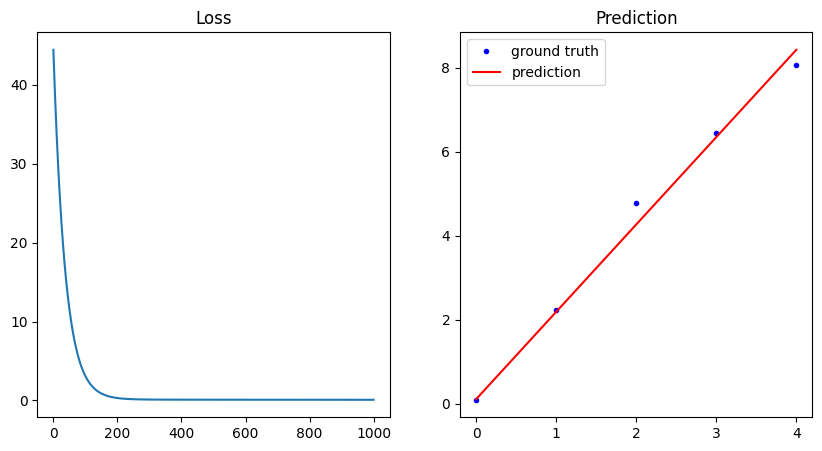

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()

## 4.3 데이터 불러오기

### 4.3.1 파이토치 제공 데이터 사용
- 데이터셋은 이미지와 라벨이 동시에 들어있는 튜플(tuple) 형태
- trainset[0]: 학습 데이터의 첫 번째 데이터로 이미지 한 장[0][0]과 라벨 숫자 하나[0][1]가 저장되어 있음
- 이미지 사이즈 3x16x16 이라면,
  - 채널 수(RGB): 3
  - 이미지의 너비와 높이: 16x16

Files already downloaded and verified
Files already downloaded and verified
torch.Size([3, 16, 16])
torch.Size([50, 3, 16, 16])


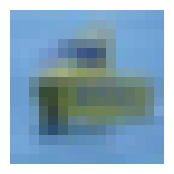

In [9]:
import torch # 파이토치 기본 라이브러리
import torchvision # 이미지
import torchvision.transforms as tr # 이미지와 전처리
from torch.utils.data import DataLoader, Dataset # 데이터로를 모델에 사용할 수 있도록 정리해 줌
import numpy as np
import matplotlib.pyplot as plt

# 전처리
transf = tr.Compose([tr.Resize(16),tr.ToTensor()]) # 16x16 이미지 크기 변환 후 텐서 타입으로 변환
# CIFAR10 데이터 불러오기
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf) # 학습 데이터
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf) # 테스트 데이터

print(trainset[0][0].size())

# 데이터를 미니 배치 형태로 만들기
# 무작위로 데이터를 섞어 한 번에 50개의 이미지를 묶은 배치로 제공
trainloader = DataLoader(trainset, batch_size=50, shuffle=True)
testLoader = DataLoader(testset, batch_size=50, shuffle=False)

# 배치의 개수 = 학습 이미지 개수 / 배치 사이즈
len(trainloader)

# 배치 이미지 확인
images,labels = next(iter(trainloader)) # trainloader의 첫 번째 배치 불러옴
print(images.size()) # 배치 사이즈 = (배치 크기)x(채널 수)x(너비)x(높이)

oneshot = images[1].permute(1,2,0).numpy() # permute은 기존 차원의 위치인 0,1,2를 1,2,0으로 바꾸는 함수
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

### 4.3.3 정리되지 않은 커스텀 데이터 불러오기
- 이미지 데이터라도 이미지가 아닌 텍스트, 리스트, 배열 등 형태도 있음

In [ ]:
from torch.utils.data import Dataset

class 클래스명(Daataset): # Dataset을 상속받아 DataLoader에서 배치 단위로 불러올 수 있게 함
  # 데이터 세팅에 필요한 것들을 미리 정의함
  def __init__(self):
    ...
  # 이후 DataLoader를 통해 샘플이 요청되면 인덱스에 해당하는 샘플을 찾아서 줌
  def __getitem__(self, index):
    ...
  # 크기 반환
  def __len__(self):
    ...

In [10]:
# 커스텀 데이터 세트 예시

train_images = np.random.randint(256, size=(100,32,32,3))/255
train_labels = np.random.randint(2, size=(100,1))

class TensorData(Dataset):
  def __init__(self, x_data, y_data): # 데이터를 받아 텐서로 변환
    self.x_data = torch.FloatTensor(x_data)
    self.x_data = self.x_data.permute(0,3,1,2)
    self.y_data = torch.LongTensor(y_data)
    self.len = self.y_data.shape[0] # 입력 데이터의 개수

  # 뽑아낼 데이터에 대해 인덱스 처리
  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return self.len

train_data = TensorData(train_images, train_labels)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

### 4.3.4 커스텀 데이터와 커스텀 전처리 사용하기
- 파이토치는 전처리 함수들을 제공하여 매우 편리하게 사용할 수 있지만, 이미지의 경우 PIL Image 타입이거나 Tensor 타입일 때 사용 가능
- 전처리 클래스 2개 정의 예시

In [13]:
# 텐서 변환 처리 클래스: 입력 데이터를 텐서 데이터로 변환하고 학습에 맞는 크기로 변환

class ToTensor:
  # __call__ 함수는 입력값을 하나씩 불러오므로 permute(0,3,1,2)이 아닌 permute(2,0,1)
  def __call__(self, sample):
    inputs, labels = sample
    inputs = torch.FloatTensor(inputs) # 텐서로 변환
    inputs = inputs.permute(2,0,1) # 크기 변경
    return inputs, torch.LongTensor(labels)

In [33]:
# CutOut 전처리 클래스: 이미지 내부에 무작위로 사각형 영역을 선택하여 0으로 만드는 데이터 증식 방법

class CutOut:
  # ToTensor와 다르게 외부에서 CutOut 발생 비율을 받기 위해 __init__ 함수로 ratio를 받음
  # 기본 ratio는 0.5로 세팅하면 불러온 이미지에 대해 50% 확률로 CutOut를 발현함
  def __init__(self, ratio=.5):
    self.ratio = int(1/ratio)

  # 샘플을 받음
  def __call__(self, sample):
    inputs, labels = sample
    active = int(np.random.randint(0, self.ratio, 1)) # 정수를 뽑음 (50%일 경우 0과 1 중 하나를 뽑는다)

    if active == 0: # 0이면 CutOut 발현, 아니라면 원본을 그대로 내보냄
      _, w, h = inputs.size() # 이미지의 너비와 높이를 받아
      min_len = min(w, h) # 최솟값을 구함. inputs의 크기는 (채널 수, 너비, 높이)이므로 변수 3개 선언해야 하지만, 채널 수는 필요없음
      box_size = int(min_len//4) # CutOut의 크기를 길이의 최솟값의 25%로 설정
      idx = int(np.random.randint(0, min_len-box_size, 1)) # idx를 통해 CutOut 박스의 좌측 상단 꼭지점 위치 지정
      inputs[:, idx:idx+box_size, idx:idx+box_size] = 0 # 해당 정사각형 영역의 값을 0으로 대체

    return inputs, labels

In [34]:
# 4.3.3의 MyDataset에서 전처리 추가

class MyDataset(Dataset):
  def __init__(self, x_data, y_data, transform=None): # transform=None은 전처리를 사용하지 않겠다는 의미
    self.x_data = x_data
    self.y_data = y_data
    self.transform = transform
    self.len = len(y_data)
    self.tensor = ToTensor()

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

    # transform이 None이 아니라면 __getitem__에서 sample을 반환하기 전에 전처리를 할 수 있도록 if문 작성
    if self.transform:
      sample = self.transform(sample)
    else: # None이면 텐서 변환은 기본적으로 하도록 구성
      sample = self.tensor(sample)
    return sample

  def __len__(self):
    return self.len

In [35]:
trans = tr.Compose([ToTensor(), CutOut()])
dataset1 = MyDataset(train_images, train_labels, transform=trans)
train_loader1 = DataLoader(dataset1, batch_size=10, shuffle=True)

In [36]:
print(images1.size())

torch.Size([10, 32, 32, 3])


TypeError: Invalid shape (36, 52, 32) for image data

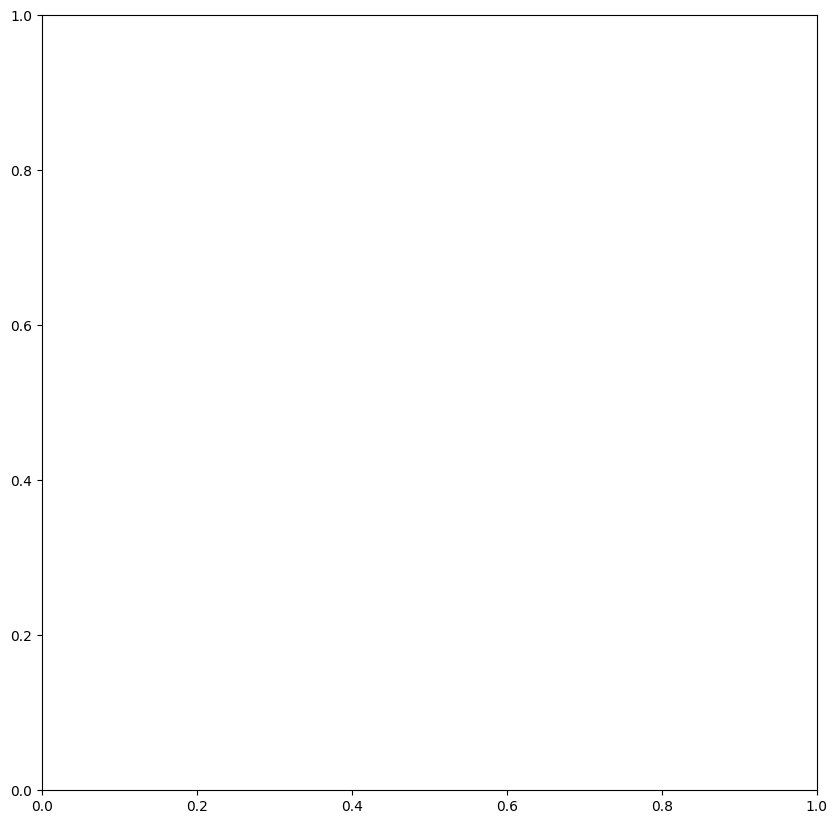

In [37]:
import torchvision
images1, labels1 = next(iter(train_loader1))

def imshow(img):
  plt.figure(figsize=(10, 100))
  plt.imshow(img.permute(1,2,0).numpy())
  plt.show()

imshow(torchvision.utils.make_grid(images1, nrow=10))

### 4.3.5 커스텀 데이터와 파이토치 제공 전처리 사용하기

In [38]:
class MyTransform:
  def __call__(self, sample):
    inputs, labels = sample
    inputs = torch.FloatTensor(inputs)
    inputs = inputs.permute(2,0,1)
    labels = torch.FloatTensor(labels)

    # tr_Compose는 차례로 전처리 작업을 하므로 가장 첫 번째에 tr.ToPILImage()를 넣어 이미지 타입을 바꿀 수 있음
    transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor()])
    final_output = transf(inputs) # 다음 불러온 샘플을 전처리 작업에 넣어줌

    return final_output, labels

In [39]:
class MyDataset(Dataset):
  def __init__(self, x_data, y_data, transform=None): # transform=None은 전처리를 사용하지 않겠다는 의미
    self.x_data = x_data
    self.y_data = y_data
    self.transform = transform
    self.len = len(y_data)
    self.tensor = ToTensor()

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

    # transform이 None이 아니라면 __getitem__에서 sample을 반환하기 전에 전처리를 할 수 있도록 if문 작성
    if self.transform:
      sample = self.transform(sample)
    else: # None이면 텐서 변환은 기본적으로 하도록 구성
      sample = self.tensor(sample)
    return sample

  def __len__(self):
    return self.len

dataset2 = MyDataset(train_images, train_labels, transform=MyTransform())
train_loader2 = DataLoader(dataset2, batch_size=10, shuffle=True)

### 4.3.6 커스텀 전처리와 파이토치에서 제공하는 전처리 함께 사용하기
- 4.3.4에서 사용한 CutOut과 달리 위 CutOut은 라벨을 받지 않고 이미지를 받아 처리하도록 세팅한다.
그 이유는 Compose 내부에 있는 제공된 전처리는 이미지만 받아서 처리하기에 그 양식을 맞춰 줘야 하기 때문. 우리가 만든 CutOut은 텐서나 넘파이 배열 타입 모두 작동을 하게 만들었지만 PILImage 타입에서는 타입 오류가 나기 때문에 tr.ToTensor() 뒤에 CutOut 배치.

In [41]:
class CutOut:
  def __init__(self, ratio=.5):
    self.ratio = int(1/ratio)

  def __call__(self, inputs):
    active = int(np.random.randint(0, self.ratio, 1))

    if active == 0:
      _, w, h = inputs.size()
      min_len = min(w, h)
      box_size = int(min_len//4)
      idx = int(np.random.randint(0, min_len-box_size, 1))
      inputs[:, idx:idx+box_size, idx:idx+box_size] = 0

    return inputs

# CIFAR10 데이터가 배치 10개씩 나누어졌으며 이미지 사이즈를 128로 늘린 후
# 텐서로 변환되고 50% 확률로 무작위 선택하여 CutOut 적용!
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)

Files already downloaded and verified


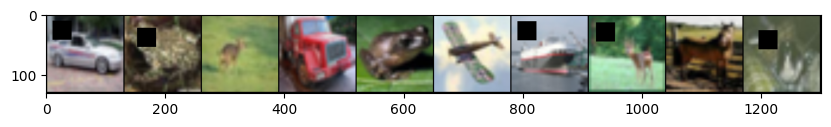

torch.Size([10, 3, 128, 128])


In [42]:
trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
images, labels= next(iter(trainloader))
imshow(torchvision.utils.make_grid(images,  nrow=10))
print(images.size()) # 배치 및 이미지 크기 확인